# Aim and Objectives

The aim of this project is to demonstrate an end-to-end data science project in Liver disease prediction. To achieve our main, the following objectives were met:
* Load the dataset
* Data visualization 
* Data cleaning/preprocessing
* Data transformation
* Model building and evaluation
* Web model deployment using Streamlit

# Step 0: Problem statement and Dataset
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. 
The dataset used for this project is obtained from [Kaggle](https://www.kaggle.com/datasets/uciml/indian-liver-patient-records/data). The dataset contains data about biochemical compounds obtained from tests like:

* **Total Bilirubin**: This measures the total amount of bilirubin in the blood, which can indicate liver function or potential liver problems.
* **Direct_Bilirubin**: This measures the amount of bilirubin that is directly conjugated with glucuronic acid. Elevated levels can indicate liver disease or obstruction of the bile ducts.
* **Alkaline Phosphotase:** This is an enzyme found in various tissues throughout the body, including the liver, bones, and bile ducts. Elevated levels can indicate liver or bone disorders.
* **Alamine Aminotransferase (ALT or SGPT)**: This enzyme is primarily found in the liver and is released into the bloodstream when liver cells are damaged. Elevated levels can indicate liver damage or disease.
* **Aspartate Aminotransferase (AST or SGOT)**: Similar to ALT, AST is an enzyme found in the liver and other tissues. Elevated levels can indicate liver damage, but it's less specific to the liver compared to ALT.
* **Total Proteins**: This measures the total amount of proteins in the blood, including albumin and globulin.
* **Albumin**: This is a protein made by the liver. Low levels can indicate liver damage or disease.
* **Albumin/Globulin Ratio**: This ratio is calculated by dividing the albumin level by the globulin level. It can be useful in assessing liver function and diagnosing certain diseases.

The dataset has 583 rows and 11 columns.

# Step 1: Library/Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Step 2: Data Loading

In [2]:
# import dataset
df = pd.read_csv('indian_liver_patient.csv')
df.head() #displays first five rows

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
#
print(df.dtypes); print(df.shape)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object
(583, 11)


# Step 3: Exploratory Data Analysis

In [4]:
# create a column based on dataset to see if a patient has disease or not
def label_disease(df):
    if df['Dataset'] == 1:
        return 'Positive'
    return 'Negative'

df['diagnosis'] = df.apply(lambda df: label_disease(df), axis=1)

In [5]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,diagnosis
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,Positive
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,Positive
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,Positive
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,Positive
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,Positive


In [6]:
df['diagnosis'].value_counts()

diagnosis
Positive    416
Negative    167
Name: count, dtype: int64

In [7]:
#gender distribution

# Create a grouped bar chart with Plotly Express
fig = px.histogram(df, x="Gender",barmode="group")

# Update layout
fig.update_layout(title="Count of Gender", xaxis_title="Gender", yaxis_title="Count")

# Show the plot
fig.show()

In [8]:
# Create a grouped bar chart with Plotly Express
fig = px.histogram(df, x="Gender", color="diagnosis", barmode="group")

# Update layout
fig.update_layout(title="Count of Diagnosis by Gender", xaxis_title="Gender", yaxis_title="Count")

# Show the plot
fig.show()

More males are diagnosed with liver disease than females

In [9]:
# Define number of bins for histogram
num_bins = 10

# Define colors

# Create a facet grid with Plotly Express
fig = px.histogram(df, x='Age', color='diagnosis', facet_col='Gender', 
                   barmode='overlay',
                   nbins=num_bins,
                     category_orders={"Gender": ["Male", "Female"]})

# Update layout
fig.update_layout(bargap=0., bargroupgap=0.05, legend=dict(title='Diagnosis'))

# Show the plot
fig.show()

- More men between the age of 30 - 39years tend to develop liver disease
- Women between 40 - 49years develop liver disease
- Females 0 - 9 years develop liver disease maybe due to other complications other than smoking or drinking 

Total protein comprises albumin and globulin, both of which are synthesized in the liver, and abnormalities in their levels can indicate liver dysfunction. So let's plot it

In [10]:
# Define number of bins for histogram
num_bins = 10

# Create a facet grid with Plotly Express
fig = px.histogram(df, x='Total_Protiens', color='diagnosis', facet_col='Gender', 
                   barmode='overlay',
                   nbins=num_bins, category_orders={"Gender": ["Male", "Female"]})

# Update layout
fig.update_layout(bargap=0., bargroupgap=0.05, legend=dict(title='Diagnosis'))

# Show the plot
fig.show()


# Step 4: Data Cleaning/Transformation

This stage focuses on refining and tidying the collected data. It may involve correcting errors, handling missing data, and formatting/encoding the data consistently to ensure accuracy and quality for modelling.

In [11]:
# encode gender column
df['Gender'].replace(to_replace=['Male','Female'], value=[0, 1], inplace=True)

print(df.dtypes)

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
diagnosis                      object
dtype: object


In [23]:
#encode diagnosis column
df['diagnosis'].replace(to_replace=['Positive','Negative'], value=[1, 0], inplace=True)


In [24]:
#check for null values
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
diagnosis                     0
dtype: int64

Missing values can be handled in a number of ways:
- data removal
- statistical data imputation (mean, median)

$$ Albumin/Globulin Ratio = {Albumin \over Total Proteins} \times 2 $$

In [25]:
df['Albumin_and_Globulin_Ratio'].fillna((df['Albumin'] / df['Total_Protiens'])*2, inplace=True)


In [26]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
diagnosis                     0
dtype: int64

In [27]:
# feature and target selection

features = df[df.columns[:-2]]
target = df['diagnosis']

features

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [28]:
# normalize data
# data Standardization give data zero mean and unit variance

sc = preprocessing.StandardScaler()
scaled_features = sc.fit_transform(features)

In [29]:
scaled_features[:5]

array([[ 1.25209764,  1.76228085, -0.41887783, -0.49396398, -0.42671496,
        -0.35466541, -0.31839333,  0.29211961,  0.19896867, -0.15055272],
       [ 1.06663704, -0.56744644,  1.22517135,  1.43042334,  1.68262856,
        -0.09159933, -0.03433257,  0.93756634,  0.07315659, -0.65294199],
       [ 1.06663704, -0.56744644,  0.6449187 ,  0.93150811,  0.82158795,
        -0.11352151, -0.14518555,  0.47653296,  0.19896867, -0.18195205],
       [ 0.81935624, -0.56744644, -0.37052344, -0.38705357, -0.44731402,
        -0.36562649, -0.31146502,  0.29211961,  0.32478075,  0.16344058],
       [ 1.68483904, -0.56744644,  0.0969023 ,  0.18313526, -0.39375647,
        -0.29437943, -0.17636295,  0.75315299, -0.93334003, -1.72051919]])

In [77]:
#split data

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features, target, 
                                                    test_size=0.3, random_state=2024)

# Step 5: Model building and evaluation

In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, max_depth=10,
                               random_state=2024)  # You can adjust the number of estimators as needed
model.fit(train_x, train_y)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=2024)

In [79]:
pred_y = model.predict(test_x)

In [80]:
pred_y

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(test_y, pred_y))

0.7485714285714286


Text(83.22222222222221, 0.5, 'Actual Diagnosis')

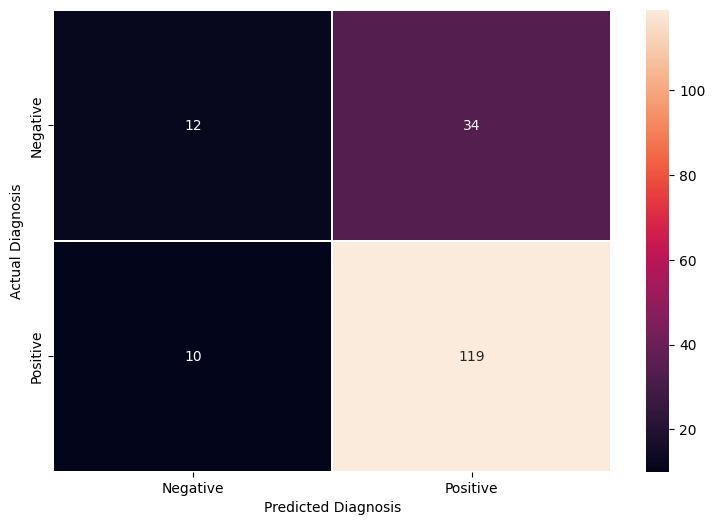

In [82]:
import seaborn as sns
cf = confusion_matrix(test_y, pred_y)

cf = pd.DataFrame(cf, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

sns.heatmap(cf, annot=True, fmt='.0f', linewidth=0.01)
plt.xlabel('Predicted Diagnosis'); plt.ylabel('Actual Diagnosis')

Text(0.5, 0, 'Feature Importance Score')

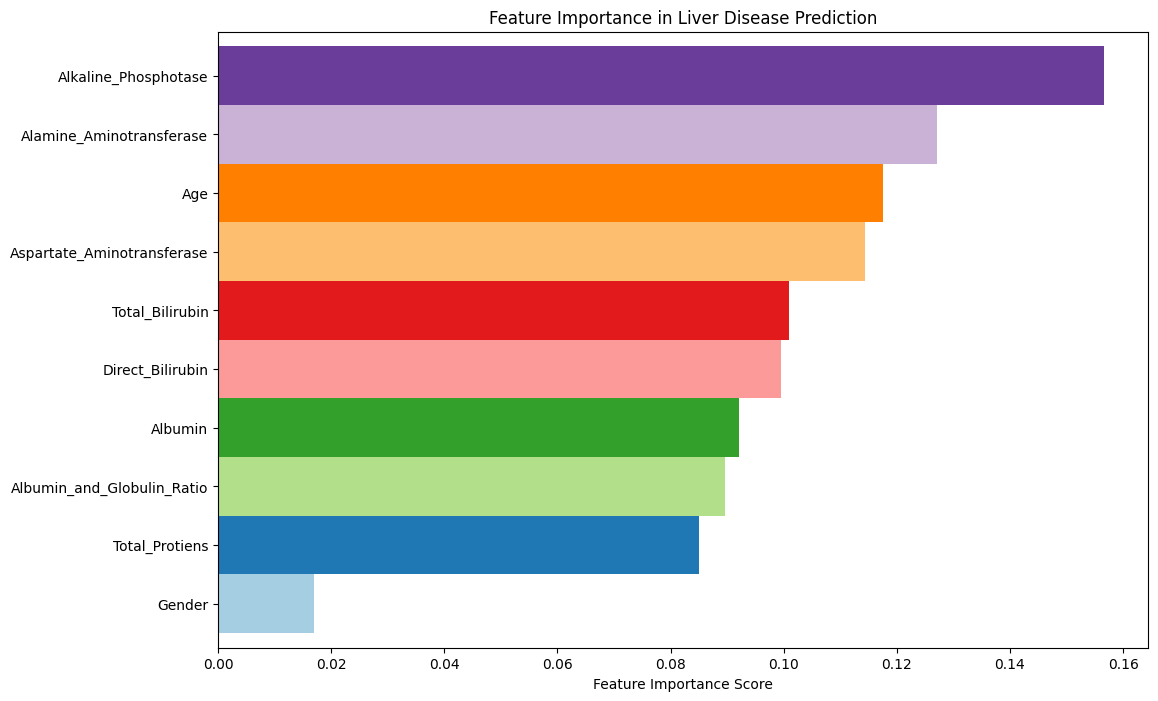

In [83]:
feat_imp = pd.Series(model.feature_importances_, index=df.columns[:-2]).sort_values(ascending=True)
plt.figure(figsize=(12,8))
feat_imp.plot(
    kind='barh',
    color=plt.cm.Paired(np.arange(len(feat_imp))), 
    width=1, 
    title='Feature Importance in Liver Disease Prediction'
)
plt.xlabel('Feature Importance Score')

# Step 6: Model deployment

In [84]:
import pickle

filename = 'model.pkl'

pickle.dump(model, open(filename, 'wb'))